In [43]:
using CSV
using Plots
using DataFrames

In [45]:
# smoothing a vector's values by applying moving average
function moving_average(data; window_size = 100)
    ma = []

    for i = 1 : size(data, 1)
        if i < window_size
            append!(ma, [sum(data[1:i]) / i])
        else
            append!(ma, [sum(data[i-window_size+1:i]) / window_size])
        end
    end

    ma
end

moving_average (generic function with 1 method)

In [46]:
parkinson_data = CSV.read("./filtered_data.csv", DataFrame)

parkinson_copy = deepcopy(parkinson_data)

Row,Id,Subject,Visit,Test,Medication,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,event
,String15,String7,Int64,Int64,String3,Int64,Float64,Float64,Float64,Int64,Int64,Int64,String7
1,009ee11563,f62eec,4,2,on,0,-9.4173,0.767819,-1.75824,0,0,0,Normal
2,009ee11563,f62eec,4,2,on,1,-9.4251,0.768246,-1.75058,0,0,0,Normal
3,009ee11563,f62eec,4,2,on,2,-9.41995,0.779039,-1.74259,0,0,0,Normal
4,009ee11563,f62eec,4,2,on,3,-9.42127,0.772523,-1.74651,0,0,0,Normal
5,009ee11563,f62eec,4,2,on,4,-9.42811,0.777142,-1.75555,0,0,0,Normal
6,009ee11563,f62eec,4,2,on,5,-9.42602,0.774812,-1.76021,0,0,0,Normal
7,009ee11563,f62eec,4,2,on,6,-9.42569,0.768126,-1.7736,0,0,0,Normal
8,009ee11563,f62eec,4,2,on,7,-9.43509,0.765923,-1.76937,0,0,0,Normal
9,009ee11563,f62eec,4,2,on,8,-9.43209,0.770584,-1.77557,0,0,0,Normal


In [64]:
window_size = 100

parkinson_copy[!, "AccV"]  = moving_average(parkinson_copy[!, "AccV"], window_size=window_size)
parkinson_copy[!, "AccML"] = moving_average(parkinson_copy[!, "AccML"], window_size=window_size)
parkinson_copy[!, "AccAP"] = moving_average(parkinson_copy[!, "AccAP"], window_size=window_size)

parkinson_copy

Row,Id,Subject,Visit,Test,Medication,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,event
,String15,String7,Int64,Int64,String3,Int64,Any,Any,Any,Int64,Int64,Int64,String7
1,009ee11563,f62eec,4,2,on,0,-9.4173,0.767819,-1.75824,0,0,0,Normal
2,009ee11563,f62eec,4,2,on,1,-9.41742,0.767833,-1.758,0,0,0,Normal
3,009ee11563,f62eec,4,2,on,2,-9.41752,0.767889,-1.75776,0,0,0,Normal
4,009ee11563,f62eec,4,2,on,3,-9.41761,0.76796,-1.75753,0,0,0,Normal
5,009ee11563,f62eec,4,2,on,4,-9.41769,0.768038,-1.75732,0,0,0,Normal
6,009ee11563,f62eec,4,2,on,5,-9.41777,0.768119,-1.75712,0,0,0,Normal
7,009ee11563,f62eec,4,2,on,6,-9.41784,0.768199,-1.75695,0,0,0,Normal
8,009ee11563,f62eec,4,2,on,7,-9.4179,0.768277,-1.75679,0,0,0,Normal
9,009ee11563,f62eec,4,2,on,8,-9.41796,0.768352,-1.75665,0,0,0,Normal


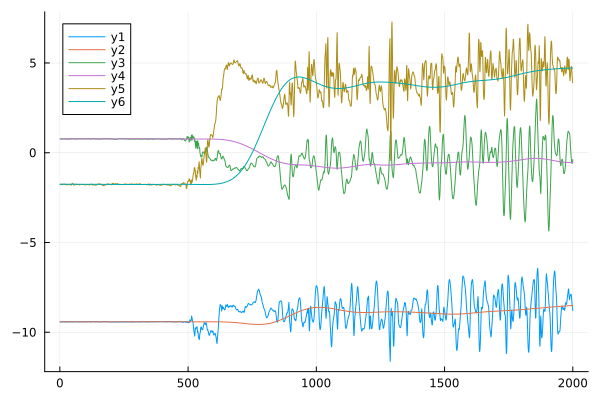

In [65]:
p = Plots.plot(collect(1:2000), parkinson_data[!, "AccV"][1:2000])
Plots.plot!(p, collect(1:2000), parkinson_copy[!, "AccV"][1:2000])

Plots.plot!(p, collect(1:2000), parkinson_data[!, "AccML"][1:2000])
Plots.plot!(p, collect(1:2000), parkinson_copy[!, "AccML"][1:2000])

Plots.plot!(p, collect(1:2000), parkinson_data[!, "AccAP"][1:2000])
Plots.plot!(p, collect(1:2000), parkinson_copy[!, "AccAP"][1:2000])

In [66]:
CSV.write("./smoothed_filtered_data.csv", parkinson_copy)

"./smoothed_filtered_data.csv"